In [84]:
import obspy as obs
import numpy as np
import matplotlib.pyplot as plt

from andbro__crosscorrelation import __crosscorrelation
from andbro__savefig import __savefig

In [29]:
def __makeplotStreamPSD2(st, config):

    from scipy import fftpack
    from numpy import abs, log10
    from scipy.signal import welch, hann


    nblock =  4096
    overlap = 1028
    win = hann(nblock, True)

    NN = len(st)
    
    fig, axes = plt.subplots(NN,2,figsize=(15,10), sharex='col')

    plt.subplots_adjust(hspace=0.3)

    ## _______________________________________________

    st.sort(keys=['channel'], reverse=True)
    
    for i, tr in enumerate(st):

        ff, Pxx = welch(tr.data, fs=tr.stats.sampling_rate, 
                        window=win, noverlap=overlap, nfft=nblock,
                        scaling="density",
                        return_onesided=True)

        ## _________________________________________________________________
        axes[i,0].plot(
                    tr.times()/86400,
                    tr.data,
                    color='black',
                    label='{} {}'.format(tr.stats.station, tr.stats.channel),
                    lw=1.0,
                    )


        ## _________________________________________________________________
        axes[i,1].loglog(
                    ff,
                    Pxx,
                    color='black',
                    lw=1.0,
                    )
        
#         axes[i,1].vlines(1/86400,min(Pxx[:]), max(Pxx[:]), color="darkgrey", alpha=1.0, zorder=0)
#         axes[i,1].vlines(2/86400,min(Pxx[:]), max(Pxx[:]), color="darkgrey", alpha=1.0, zorder=0)
        
        axes[NN-1,0].set_xlabel("Time (days)")
        axes[NN-1,1].set_xlabel("Frequency (Hz)")
        
        axes[i,1].set_ylim(min(Pxx[:]), max(Pxx[:]))
        
        axes[i,0].set_ylabel(r'$\Omega$ ($\mu$rad)')    
        axes[i,1].set_ylabel(r'PSD (rad$^2$/Hz)')        
        axes[i,0].legend(loc='upper left',bbox_to_anchor=(0.8, 1.10), framealpha=1.0)
#         axes[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#         axes[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#         axes[i,1].set_xlim(1e-7,1e-4)

    
    
    return fig

In [43]:
def __makeplotStreamSpectra(st, config):

    from andbro__fft import __fft
    from scipy import fftpack
    from numpy import pi

    NN = len(st)

    fig, axes = plt.subplots(NN,2,figsize=(20,20), sharex='col')

    plt.subplots_adjust(hspace=0.3)

    ## _______________________________________________

    st.sort(keys=['channel'], reverse=True)
    
    for i, tr in enumerate(st):

        sxx, ff, pp = __fft(tr.data, dt=tr.stats.delta)


        ## _________________________________________________________________
        axes[i,0].plot(
                    tr.times()/3600,
                    tr.data,
                    color='black',
                    label='{} {}'.format(tr.stats.station, tr.stats.channel),
                    lw=1.0,
                    )


        ## _________________________________________________________________
        if "fmin" in config.keys() and "fmax" in config.keys():
            lbl = f"{config['fmin']} - {config['fmax']} Hz"
        else:
            lbl = None
            
        axes[i,1].semilogx(
                    ff,
                    sxx,
                    color='black',
                    lw=1.0,
                    label=lbl,
                    )
          
        axes[i,1].legend()
        
        
#         axes[i,1].vlines(1/86400,min(fxx[:]), max(fxx[:]), color="darkgrey", alpha=1.0, zorder=0)
#         axes[i,1].vlines(2/86400,min(fxx[:]), max(fxx[:]), color="darkgrey", alpha=1.0, zorder=0)
        
        axes[NN-1,0].set_xlabel("Time (hours)")
        axes[NN-1,1].set_xlabel("Frequency (Hz)")
                      
        axes[i,0].set_ylabel(r'P (Pa)')    
        axes[i,1].set_ylabel(r'ASD (Pa/Hz)')        
        axes[i,0].legend(loc='upper left',bbox_to_anchor=(0.8, 1.10), framealpha=1.0)
#         axes[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#         axes[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
        axes[i,1].set_xlim(config['fmin'],config['fmax'])
#         axes[i,1].set_ylim(1e-12,1e-9)

    plt.show();
    return fig

In [31]:
config = {}

config['fmin'] = 5e-4 # Hz
config['fmax'] = 1.0 # Hz

config['tbeg_event'] = obs.UTCDateTime("2022-01-15 09:00")
config['tend_event'] = obs.UTCDateTime("2022-01-15 18:00")

config['pathTo_infrasound'] = "/home/andbro/Documents/ROMY/Scripps_Fiber/data/20220115/"

config['pathTo_strainmeter'] = "/home/andbro/Documents/ROMY/Scripps_Fiber/data/strainmeter/"

In [32]:
!ls /home/andbro/Documents/ROMY/Scripps_Fiber/data/20220115

I57H1.BDF.w  I57H3.BDF.w  I57H5.LKO.w  I57H6.BDF.w  I57.wfdisc
I57H1.LDA.w  I57H4.BDF.w  I57H5.LWD.w  I57H7.BDF.w
I57H2.BDF.w  I57H5.BDF.w  I57H5.LWS.w  I57H8.BDF.w


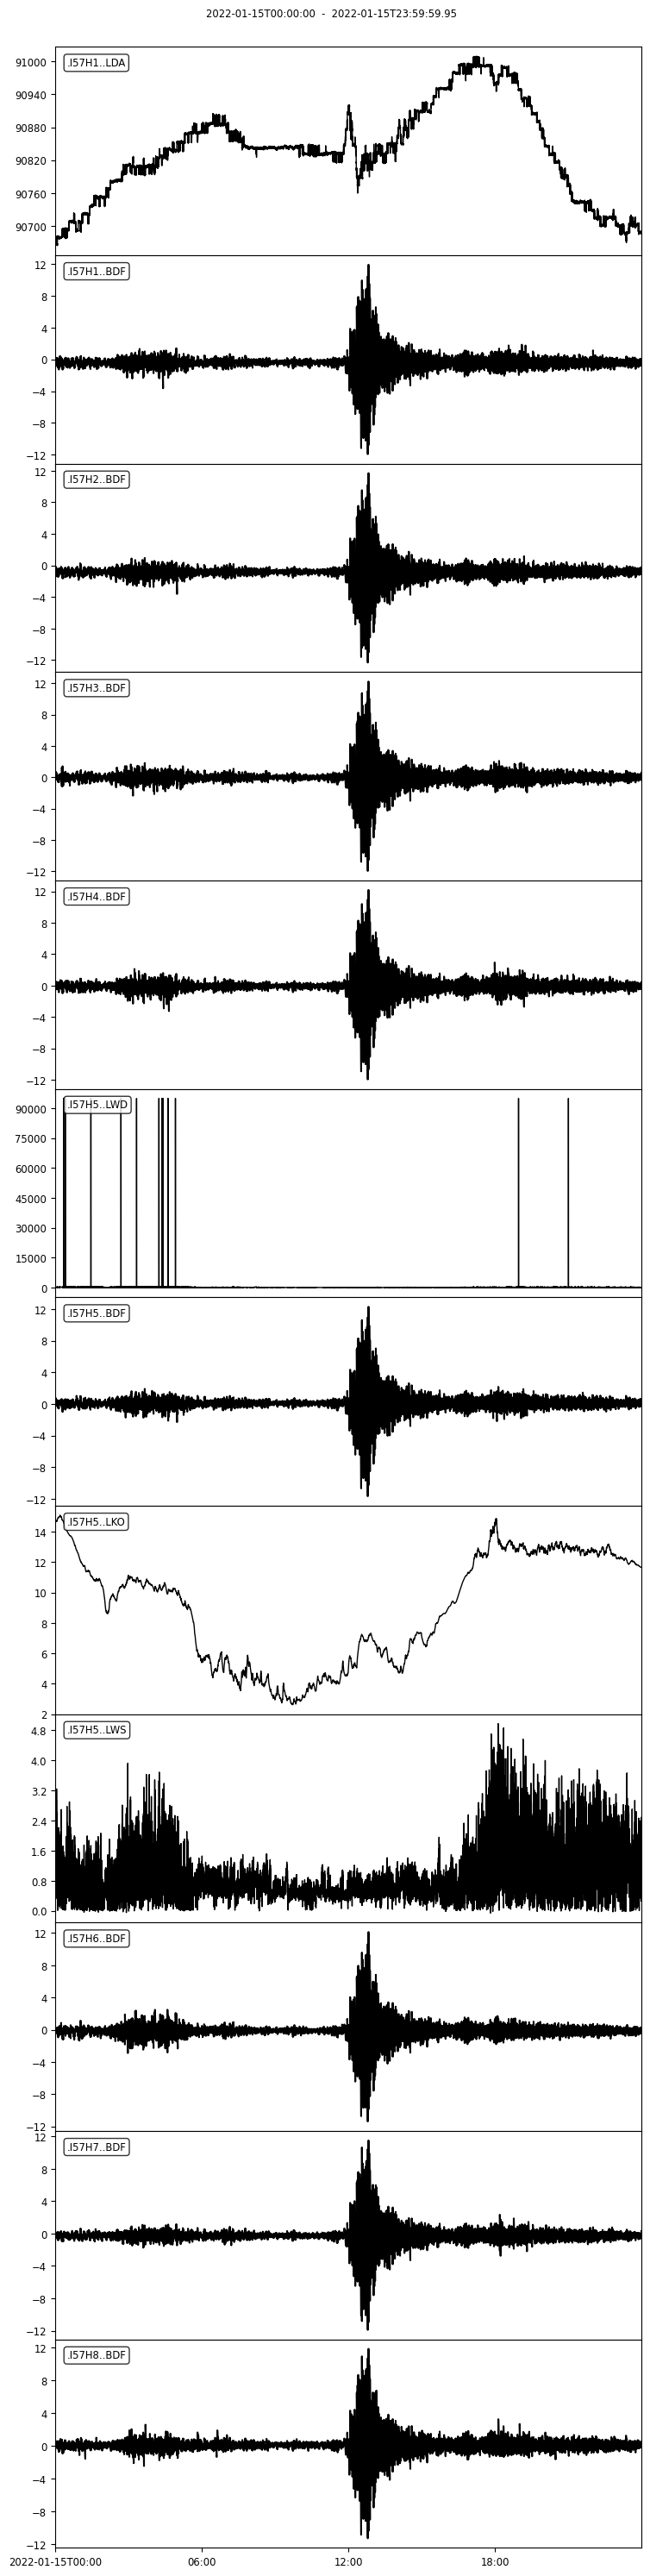

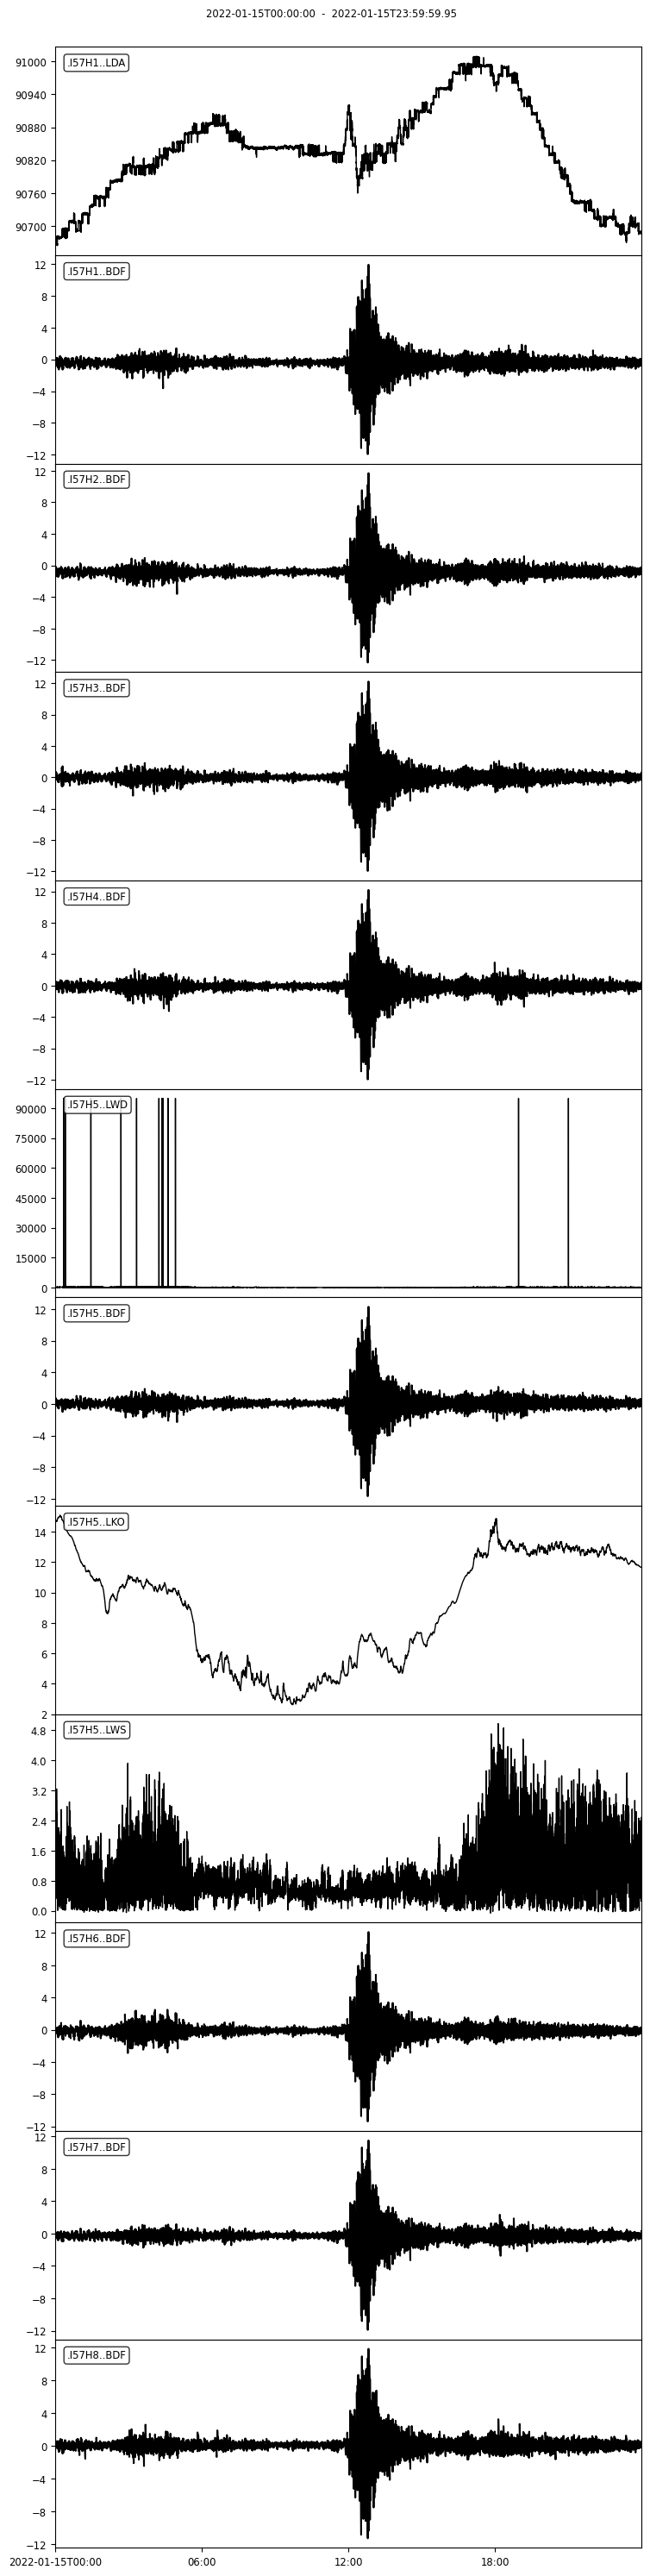

/home/andbro/anaconda3/envs/obs/lib/python3.7/site-packages/obspy/signal/filter.py:67: UserWarning: Selected high corner frequency (1.0) of bandpass is at or above Nyquist (0.5). Applying a high-pass instead.
  warnings.warn(msg)


12 Trace(s) in Stream:
.I57H1..BDF | 2022-01-15T00:00:00.000000Z - 2022-01-15T23:59:59.950000Z | 20.0 Hz, 1728000 samples
.I57H1..LDA | 2022-01-15T00:00:00.000000Z - 2022-01-15T23:59:59.000000Z | 1.0 Hz, 86400 samples
.I57H2..BDF | 2022-01-15T00:00:00.000000Z - 2022-01-15T23:59:59.950000Z | 20.0 Hz, 1728000 samples
.I57H3..BDF | 2022-01-15T00:00:00.000000Z - 2022-01-15T23:59:59.950000Z | 20.0 Hz, 1728000 samples
.I57H4..BDF | 2022-01-15T00:00:00.000000Z - 2022-01-15T23:59:59.950000Z | 20.0 Hz, 1728000 samples
.I57H5..BDF | 2022-01-15T00:00:00.000000Z - 2022-01-15T23:59:59.950000Z | 20.0 Hz, 1728000 samples
.I57H5..LKO | 2022-01-15T00:00:00.000000Z - 2022-01-15T23:59:59.000000Z | 1.0 Hz, 86400 samples
.I57H5..LWD | 2022-01-15T00:00:00.000000Z - 2022-01-15T23:59:59.000000Z | 1.0 Hz, 86400 samples
.I57H5..LWS | 2022-01-15T00:00:00.000000Z - 2022-01-15T23:59:59.000000Z | 1.0 Hz, 86400 samples
.I57H6..BDF | 2022-01-15T00:00:00.000000Z - 2022-01-15T23:59:59.950000Z | 20.0 Hz, 1728000 samples

In [33]:
st = obs.read(config['pathTo_infrasound']+"I57.wfdisc", format="CSS")

st.plot(equal_scale=False);

st.sort()

st2 = st.copy()
st2.select(channel="L*")
st2.plot(equal_scale=False);

st.detrend("demean")
st.taper(0.01)

st.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True)


In [34]:
## use calibration factor for conversion (counts -> Pa ??)
for tr in st:
    tr.data *= tr.stats.calib


Remove stations with corrupt data

In [35]:
channel_to_remove = ["LWS", "LWD", "LKO", "LDA"]

for tr in st:
    if tr.stats.channel in channel_to_remove:
        print(f"remove {tr.stats.channel}")
        try:
            st = st.remove(tr)
        except:
            print(tr, "not found")

remove LDA
remove LKO
remove LWD
remove LWS


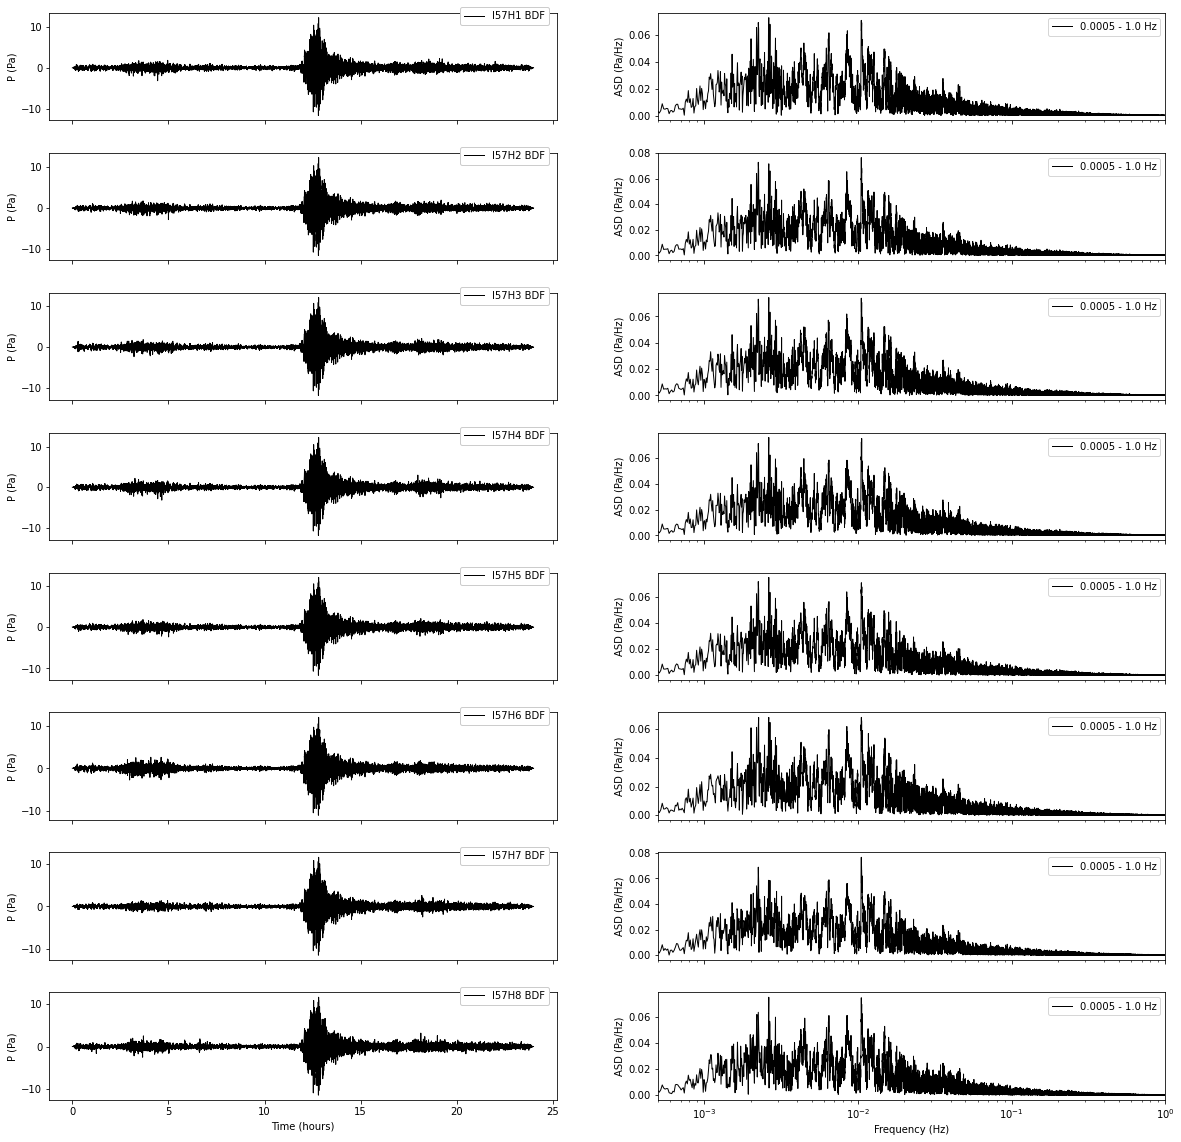

In [36]:
__makeplotStreamSpectra(st, config);

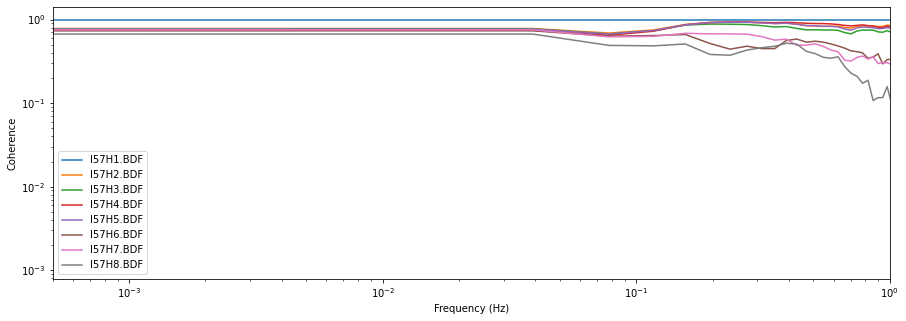

In [37]:
from scipy.signal import coherence 

plt.figure(figsize=(15,5))

for n in range(0,len(st)):
    ff, pxy = coherence(st[0].data, st[n].data, fs=st[0].stats.sampling_rate,
                    window='hann', nperseg=512, noverlap=None, nfft=None, detrend='constant', axis=- 1)
       
    
    plt.loglog(ff, pxy, label=st[n].stats.station+"."+st[n].stats.channel) 
    plt.xlim(config['fmin'], config['fmax'])
    plt.legend()
    
    plt.ylabel("Coherence")
    plt.xlabel("Frequency (Hz)")

## Load Strainmeter Data

/home/andbro/anaconda3/envs/obs/lib/python3.7/site-packages/obspy/core/trace.py:220: UserWarning: Calibration factor set to 0.0!
  warnings.warn(msg, UserWarning)


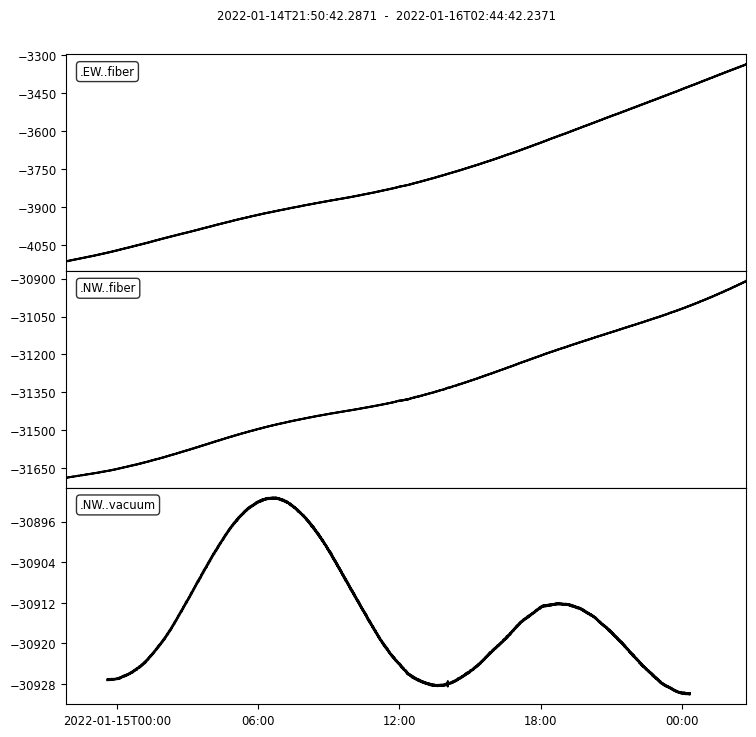

In [38]:
strain = obs.read(config['pathTo_strainmeter']+"strainmeter_css.wfdisc", format="CSS")

strain.sort()

for tr in strain:
    if tr.stats.calib == 0:
        tr.stats.calib = 1.0
           
            
for tr in strain:
    if tr.stats.station == "pfoo1":
        if tr.stats.channel == "p1s32":
            tr.stats.station = "EW"
            tr.stats.channel = "fiber"
            tr.data *= 0.4051
        elif tr.stats.channel == "p3s32":
            tr.stats.station = "NW"
            tr.stats.channel = "fiber"
            tr.data *= 0.5157             
    elif tr.stats.station == "pfoi2":
            tr.stats.station = "NW"
            tr.stats.channel = "vacuum"
            tr.data *= 0.06895
    elif tr.stats.station == "pfoi1":
        if tr.stats.channel == "p1s32":
            tr.stats.station = "Z"
            tr.stats.channel = "fiber"
            tr.data = tr.data - (1.99851 * st.select(channel="p5s32")[0].data)
            
strain.plot(equal_scale=False);

## Compare Strain and Infrasound

4 Trace(s) in Stream:
.NW..vacuum | 2022-01-15T08:59:59.992880Z - 2022-01-15T17:59:59.992880Z | 20.0 Hz, 648001 samples
.EW..fiber  | 2022-01-15T08:59:59.987100Z - 2022-01-15T17:59:59.987100Z | 20.0 Hz, 648001 samples
.NW..fiber  | 2022-01-15T08:59:59.987100Z - 2022-01-15T17:59:59.987100Z | 20.0 Hz, 648001 samples
.I57H1..BDF | 2022-01-15T09:00:00.000000Z - 2022-01-15T18:00:00.000000Z | 20.0 Hz, 648001 samples


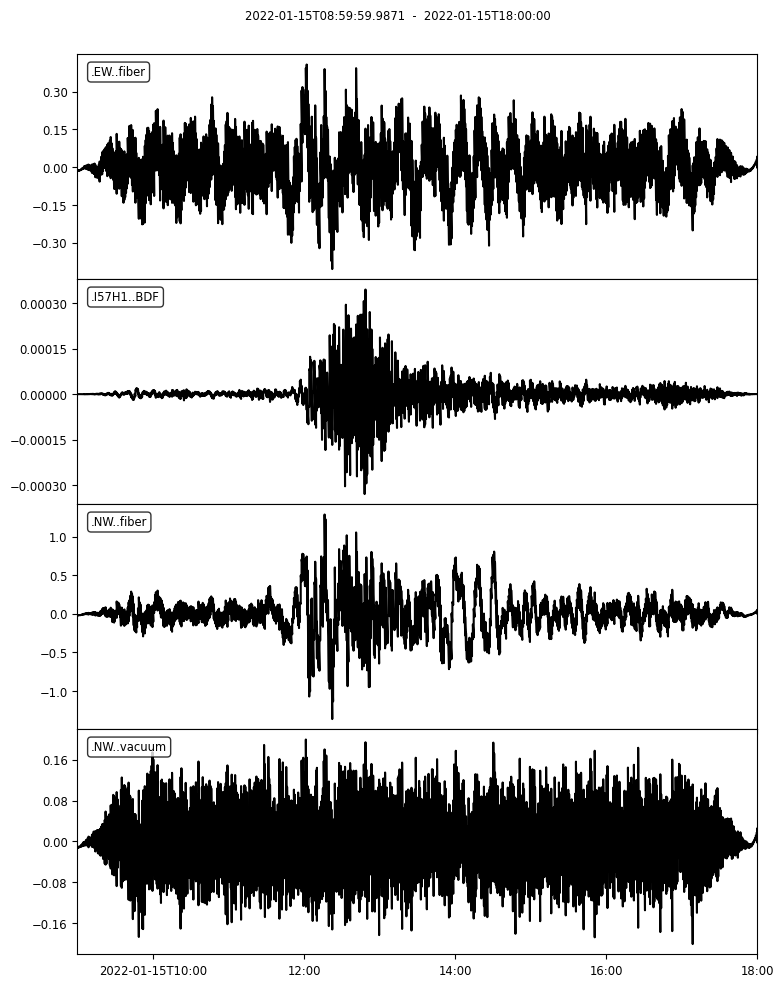

In [39]:
strain2 = strain.copy()

## add infrasound
strain2 += st.select(station="I57H1")

## trim to event times
strain2.trim(config['tbeg_event'], config['tend_event'])

## filter
strain2.detrend("simple")
strain2.taper(0.1)
strain2.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True)
# strain2.filter("bandpass", freqmin=0.001, freqmax=0.1, corners=4, zerophase=True)


strain2.resample(20)

print(strain2)
strain2.plot(equal_scale=False);

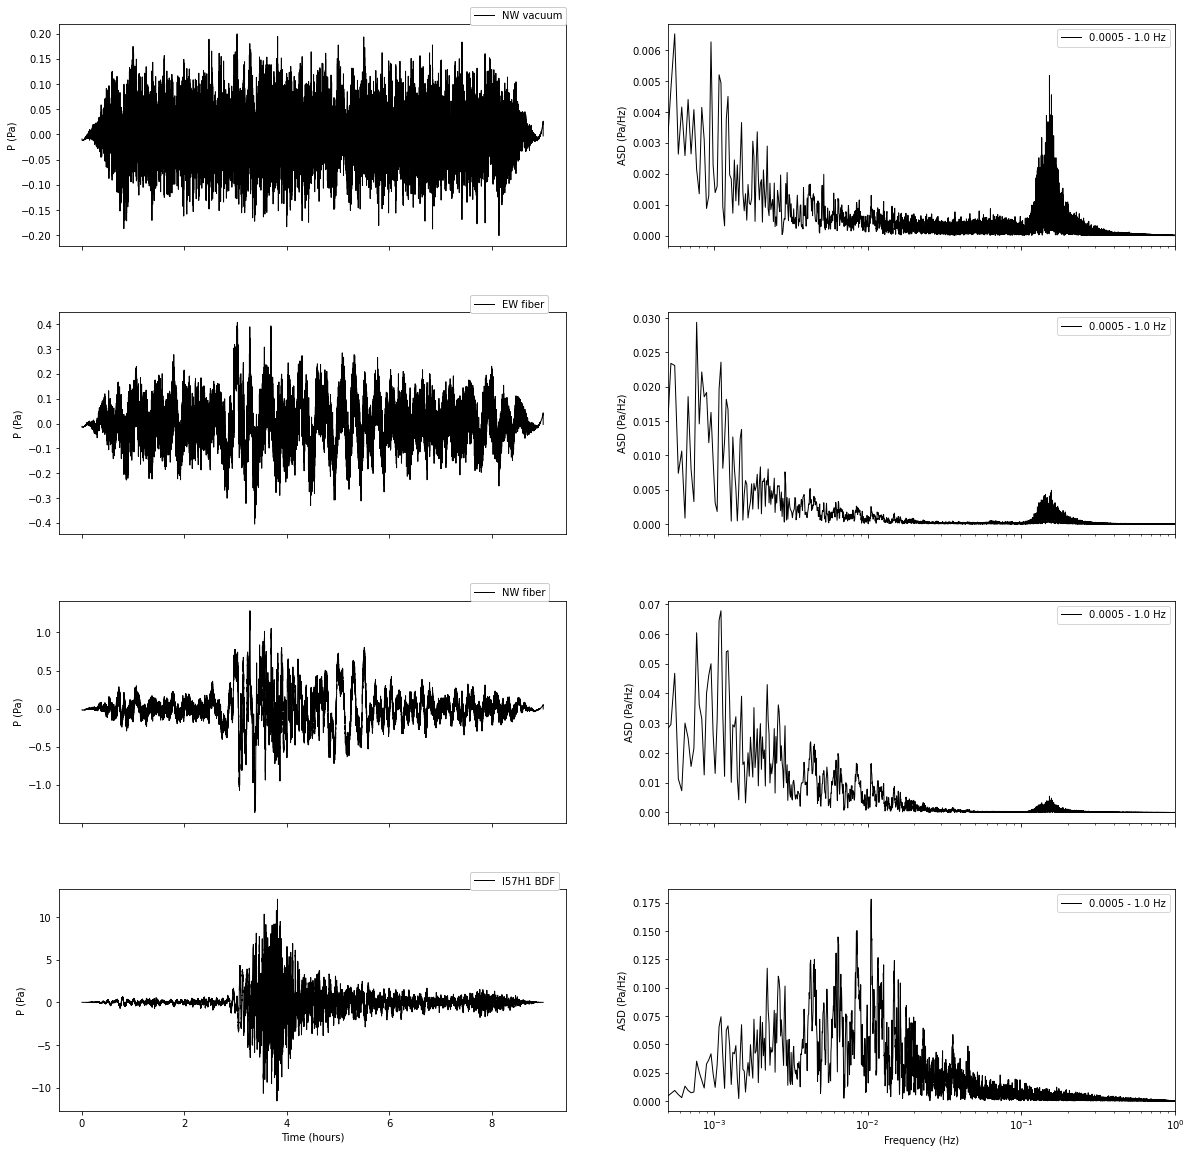

In [44]:
fig = __makeplotStreamSpectra(strain2, config);


   -> saving /home/andbro/Downloads/strain_data.png ...

   -> Done



## Compare Amplitudes

4 Trace(s) in Stream:
.NW..vacuum | 2022-01-15T08:59:59.992880Z - 2022-01-15T17:59:59.992880Z | 20.0 Hz, 648001 samples
.EW..fiber  | 2022-01-15T08:59:59.987100Z - 2022-01-15T17:59:59.987100Z | 20.0 Hz, 648001 samples
.NW..fiber  | 2022-01-15T08:59:59.987100Z - 2022-01-15T17:59:59.987100Z | 20.0 Hz, 648001 samples
.I57H1..BDF | 2022-01-15T09:00:00.000000Z - 2022-01-15T18:00:00.000000Z | 20.0 Hz, 648001 samples


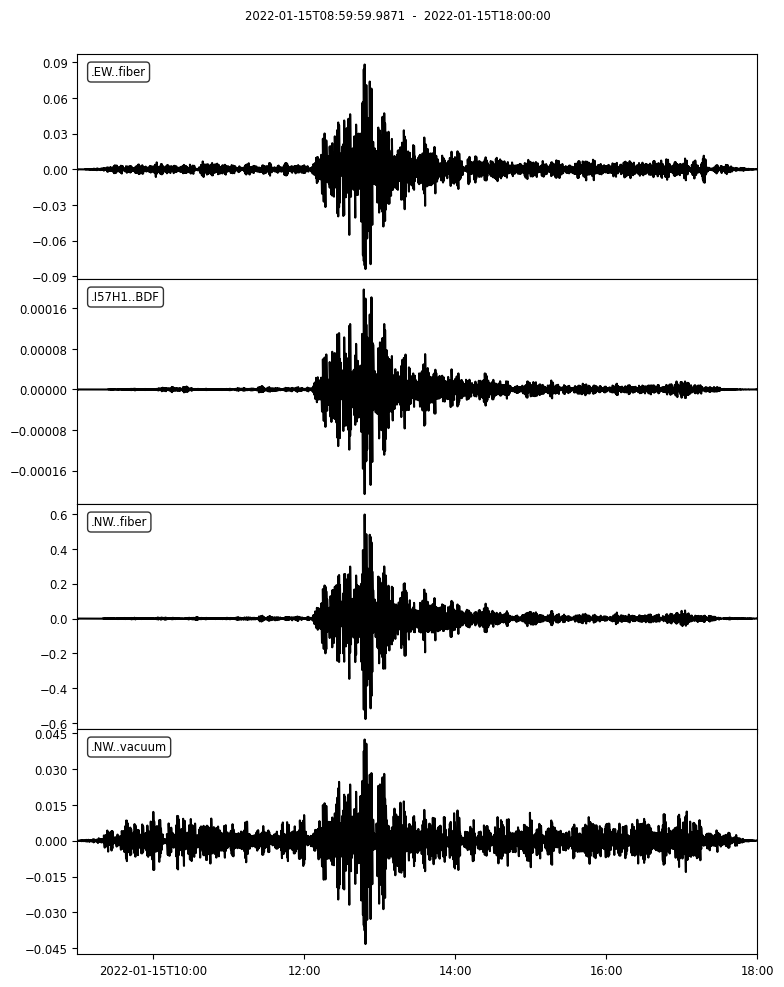

In [46]:
strain3 = strain.copy()

fmin3 = 0.01
fmax3 = 0.02

## add infrasound
strain3 += st.select(station="I57H1")

## trim to event times
strain3.trim(config['tbeg_event'], config['tend_event'])

## filter
strain3.detrend("simple")
strain3.taper(0.1)
# strain3.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True)
strain3.filter("bandpass", freqmin=fmin3, freqmax=fmax3, corners=4, zerophase=True)

# strain2.resample(20)

print(strain3)
strain3.plot(equal_scale=False);

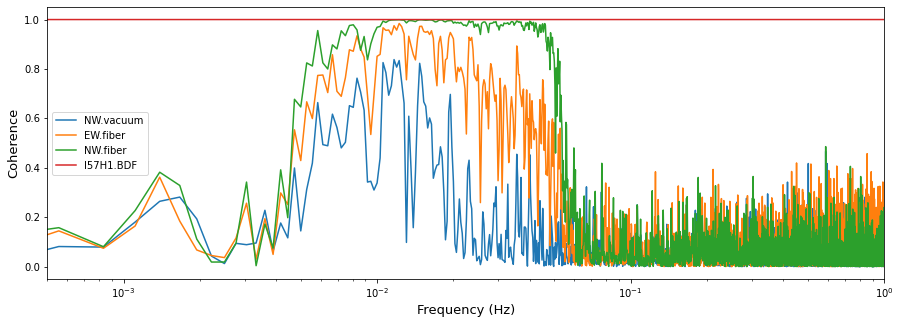

In [82]:
def __makeplot_stream_coherence(stream):
    
    from scipy.signal import coherence 
    
    font = 13
    
    fig = plt.figure(figsize=(15,5))

    for n in range(0,len(stream)):
        ff, pxy = coherence(st[0].data, stream[n].data, fs=stream[0].stats.sampling_rate,
                        window='hann', nperseg=3600*stream[0].stats.sampling_rate, noverlap=None, nfft=None, detrend='constant', axis=- 1)


        plt.semilogx(ff, pxy, label=stream[n].stats.station+"."+stream[n].stats.channel) 
        plt.xlim(config['fmin'], config['fmax'])
        plt.legend()

        plt.ylabel("Coherence", fontsize=font)
        plt.xlabel("Frequency (Hz)", fontsize=font)
        
    plt.show();
    return fig
        
fig = __makeplot_stream_coherence(strain2)
fig = __makeplot_stream_coherence(strain3)

In [83]:
# __savefig(fig, outpath="/home/andbro/Downloads/", outname="strain_coherence", mode="png", dpi=300)


   -> saving /home/andbro/Downloads/strain_coherence.png ...

   -> Done



In [50]:
infra = strain3.select(station="I57H1")[0].data
fiber = strain3.select(station="EW", channel="fiber")[0].data

# ratio = np.roll(infra, 485) / fiber
ratio = infra / fiber

In [51]:
def __get_mean_amplitude(signal, deltaN):
    
    from numpy import nanmean, nanstd, array
    
    n1, n2, amplitudes = 0, deltaN, []
    
    while n2 < len(signal):

        amplitudes.append(nanmean(signal[n1:n2]))

        n1 += deltaN
        n2 += deltaN
        
    return array(amplitudes)

dn = 200
amps_infra = __get_mean_amplitude(infra, deltaN=dn)
amps_fiber = __get_mean_amplitude(fiber, deltaN=dn)

ratio_mean = amps_infra/amps_fiber

In [52]:
def __get_cross_coeff(signal1, signal2, deltaN=100):
        
    from numpy import corrcoef, array
    
    n1, n2, cc_coef, xx = 0, deltaN, [], []
    
    while n2 < len(signal1):

        cc_coef.append(corrcoef(signal1[n1:n2], signal2[n1:n2])[0][1])
        xx.append((n2-n1)/2+n1)
        
        n1 += deltaN
        n2 += deltaN
        
    return array(cc_coef), array(xx)  

dnn = int(20*100)
cc_coeff, xx = __get_cross_coeff(np.roll(fiber, 485), infra, deltaN=dnn)

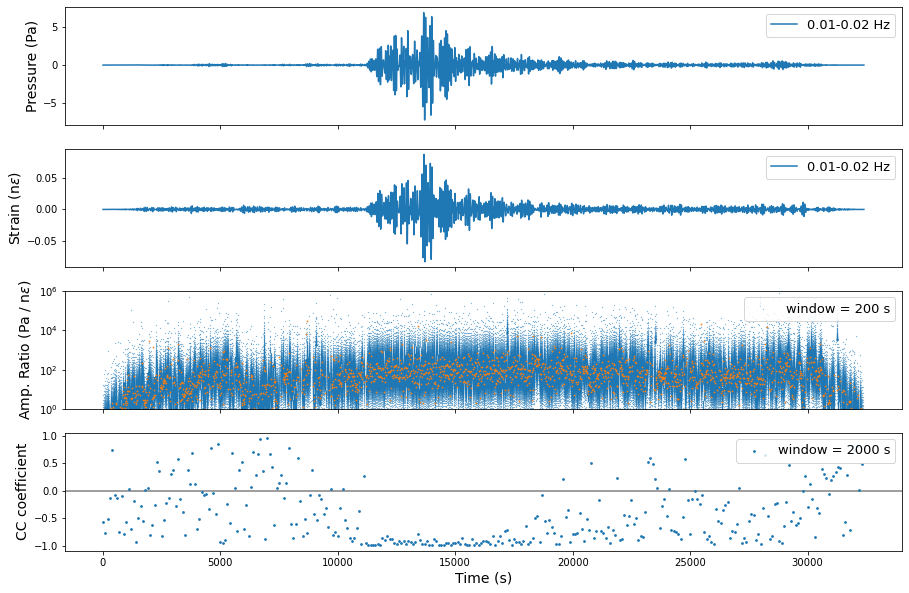


   -> saving /home/andbro/Downloads/EW_pressure_ratio.png ...

   -> Done



In [90]:
dt = 20

font = 14

fig, ax = plt.subplots(4,1, figsize=(15,10), sharex=True)

tt = np.arange(len(infra))/dt

ax[0].plot(tt, infra, label=f"{fmin3}-{fmax3} Hz")
ax[1].plot(tt,fiber, label=f"{fmin3}-{fmax3} Hz")

ax[2].scatter(tt, ratio, s=0.05, label=f"window = {dn} s")
ax[2].set_yscale("log")
ax[2].set_ylim(1e0, 1e6)
ax[2].scatter(np.array(range(len(amps_infra)))*dn/dt, ratio_mean, s=0.5)

ax[3].scatter(np.array(range(len(cc_coeff)))*dnn/dt, cc_coeff, s=3, zorder=2, label=f"window = {dnn} s")
ax[3].axhline(0.0, color="k", alpha=0.5, zorder=0)

ax[0].set_ylabel("Pressure (Pa)", fontsize=font)
ax[1].set_ylabel(r"Strain (n$\epsilon$)", fontsize=font)
ax[2].set_ylabel("Amp. Ratio (Pa / n$\epsilon$)", fontsize=font)
ax[3].set_ylabel("CC coefficient", fontsize=font)

for i in range(4):
    ax[i].legend(loc=1, fontsize=font-1)
    
ax[3].set_xlabel("Time (s)", fontsize=font)

plt.show();

# __savefig(fig, outpath="/home/andbro/Downloads/", outname="EW_pressure_ratio", mode="png", dpi=300)

## Cross Correlation

485


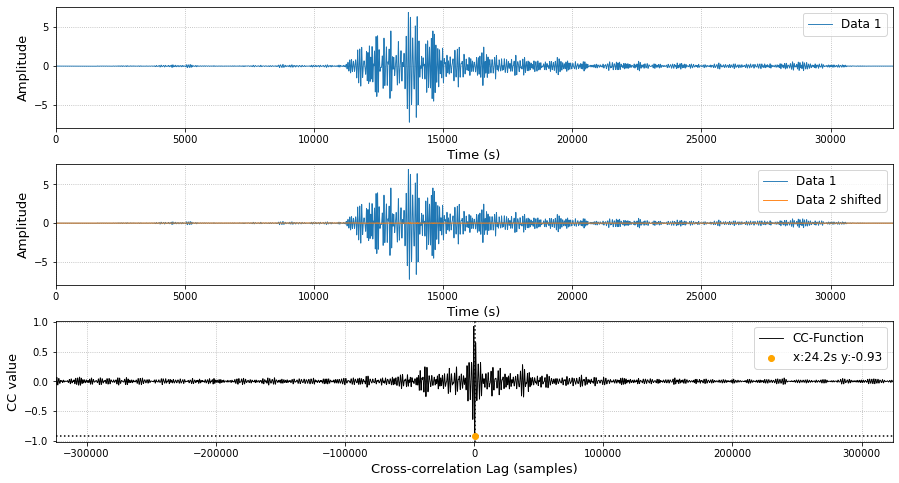

Maximum Correlation: 
 x: 485 
 y: -0.93


In [70]:
out =  __crosscorrelation(infra, fiber, deltaT=0.05)

122


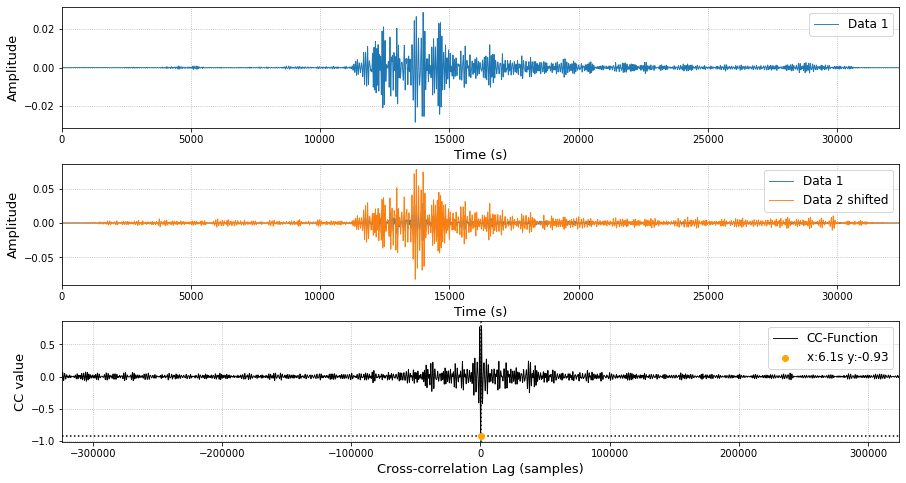

Maximum Correlation: 
 x: 122 
 y: -0.93


In [67]:
d_infra = np.diff(infra, n=1, prepend=0)

out2 =  __crosscorrelation(d_infra, fiber, deltaT=0.05)

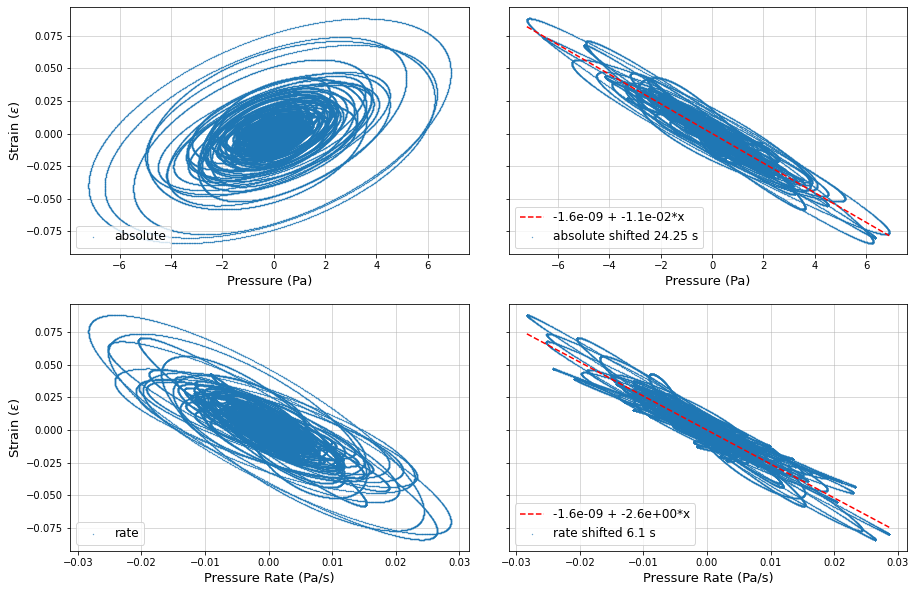

In [60]:
dt = 20 # Hz

cc_lag = out['maximum'][0]
cc_lag2 = out2['maximum'][0]

pressure = infra
strains  = fiber 

strains_shifted = np.roll(strains, shift=cc_lag)
strains_shifted2 = np.roll(strains, shift=cc_lag2)

d_pressure = np.diff(pressure, 1, prepend=0)


def __estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)

b, a = __estimate_coef(pressure, strains_shifted)
xxx = np.linspace(min(pressure), max(pressure), 100)
yyy = b + a*xxx


xxx = np.linspace(min(pressure), max(pressure), 100)
yyy = b + a*xxx

## --------------------------------

font = 13

fig, ax = plt.subplots(2, 2, figsize=(15,10), sharey=True)

plt.subplots_adjust(wspace=0.1)

ax[0,0].scatter(pressure, strains, s=0.1, label="absolute", zorder=2)
ax[0,1].scatter(pressure, strains_shifted, s=0.1, label=f"absolute shifted {cc_lag / dt} s", zorder=2)

b, a = __estimate_coef(pressure, strains_shifted)
xxx  = np.linspace(min(pressure), max(pressure), 100)
ax[0,1].plot(xxx, b + a*xxx, color="red", ls="--", label=f"{b:.1e} + {a:.1e}*x")

ax[1,0].scatter(d_pressure, strains, s=0.1, label="rate", zorder=2)
ax[1,1].scatter(d_pressure, strains_shifted2, s=0.1, label=f"rate shifted {cc_lag2/ dt} s", zorder=2)

b, a = __estimate_coef(d_pressure, strains_shifted2)
xxx  = np.linspace(min(d_pressure), max(d_pressure), 100)
ax[1,1].plot(xxx, b + a*xxx, color="red", ls="--", label=f"{b:.1e} + {a:.1e}*x")

ax[0,0].grid(zorder=0, alpha=0.6)
ax[0,1].grid(zorder=0, alpha=0.6)
ax[1,0].grid(zorder=0, alpha=0.6)
ax[1,1].grid(zorder=0, alpha=0.6)

ax[0,0].legend(loc=3, fontsize=font-1)
ax[0,1].legend(loc=3, fontsize=font-1)
ax[1,0].legend(loc=3, fontsize=font-1)
ax[1,1].legend(loc=3, fontsize=font-1)

ax[0,0].set_xlabel("Pressure (Pa)", fontsize=font)
ax[0,1].set_xlabel("Pressure (Pa)", fontsize=font)
ax[1,0].set_xlabel("Pressure Rate (Pa/s)", fontsize=font)
ax[1,1].set_xlabel("Pressure Rate (Pa/s)", fontsize=font)

ax[0,0].set_ylabel(r"Strain ($\epsilon$)", fontsize=font)
ax[1,0].set_ylabel(r"Strain ($\epsilon$)", fontsize=font)

plt.show();

In [ ]:
fig = out['figure']
from andbro__savefig import __savefig
__savefig(fig, outpath="/home/andbro/Downloads/", outname="strain_coherence", mode="png", dpi=300)